In [ ]:
## The first steps

### Project Libraries

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the .csv file

In [201]:
# Opening the file
df = pd.read_csv("data/PLTR_HistoricalData.csv")

# Reading the first 5 rows
df.head()

,Date,PX_OPEN,ChangeO,% ChangeO,PX_LAST,ChangeL,% ChangeL,PX_LOW,PX_HIGH,PX_MID,...,BEst_EPS,PX_TO_BOOK_RATIO,EBIT,ROE,ROA,EARN_YLD_HIST,PUT_CALL_VOLUME_RATIO_CUR_DAY,SHORT_INT_RATIO,BETA_ADJ_OVERRIDABLE,BETA_RAW_OVERRIDABLE
0,2/28/25,79.98,-11.93,-12.980089,84.92,0.15,0.176949,78.58,85.18,84.915,...,NaN,39.6961,11.043,10.9022,8.5092,0.2313,0.7442,NaN,2.0358,2.5537
1,2/27/25,91.91,2.75,3.084343,84.77,-4.54,-5.083417,84.17,93.62,84.770,...,NaN,39.6260,113.140,12.3976,8.5092,0.2317,0.8231,NaN,2.0508,2.5763
2,2/26/25,89.16,-1.49,-1.643685,89.31,1.47,1.673497,87.59,91.69,89.330,...,NaN,41.7482,113.140,12.3976,8.5092,0.2199,0.6235,NaN,2.0460,2.5690
3,2/25/25,90.65,-5.23,-5.454735,87.84,-2.84,-3.131892,85.25,91.70,87.845,...,NaN,41.0611,113.140,12.3976,8.5092,0.2236,0.9176,NaN,2.0462,2.5693
4,2/24/25,95.88,-11.80,-10.958395,90.68,-10.67,-10.527874,89.30,99.01,90.665,...,NaN,42.3886,113.140,12.3976,8.5092,0.2166,1.1069,NaN,2.0426,2.5639


### Converting the date and sorting from oldest to newest

In [207]:
df['Date'] = pd.to_datetime(df['Date']) #conversion to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d') #this is for removing annoying error text
df = df.sort_values('Date') #sorting of date
df = df.reset_index(drop=True) #resetting the index (for appearance)

df.head()

,Date,PX_OPEN,ChangeO,% ChangeO,PX_LAST,ChangeL,% ChangeL,PX_LOW,PX_HIGH,PX_MID,...,BEst_EPS,PX_TO_BOOK_RATIO,EBIT,ROE,ROA,EARN_YLD_HIST,PUT_CALL_VOLUME_RATIO_CUR_DAY,SHORT_INT_RATIO,BETA_ADJ_OVERRIDABLE,BETA_RAW_OVERRIDABLE
0,2020-09-30,10.00,NaN,NaN,9.50,NaN,NaN,9.11,11.42,9.505,...,NaN,13.1044,-99.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,9.69,NaN,NaN,9.46,NaN,NaN,9.23,10.10,9.445,...,NaN,13.0493,-99.145,NaN,NaN,NaN,NaN,NaN,71.1589,106.2394
2,2020-10-02,9.06,NaN,NaN,9.20,NaN,NaN,8.94,9.28,9.185,...,NaN,12.6906,-99.145,NaN,NaN,NaN,NaN,NaN,9.2217,13.3327
3,2020-10-05,9.43,NaN,NaN,9.03,NaN,NaN,8.92,9.49,9.035,...,NaN,12.4561,-99.145,NaN,NaN,NaN,NaN,NaN,2.1133,2.6699
4,2020-10-06,9.04,NaN,NaN,9.90,NaN,NaN,8.90,10.18,9.905,...,NaN,13.6562,-99.145,NaN,NaN,NaN,0.1673,NaN,0.8663,0.7994


## Missing Values

### Checking what is there

<Axes: >

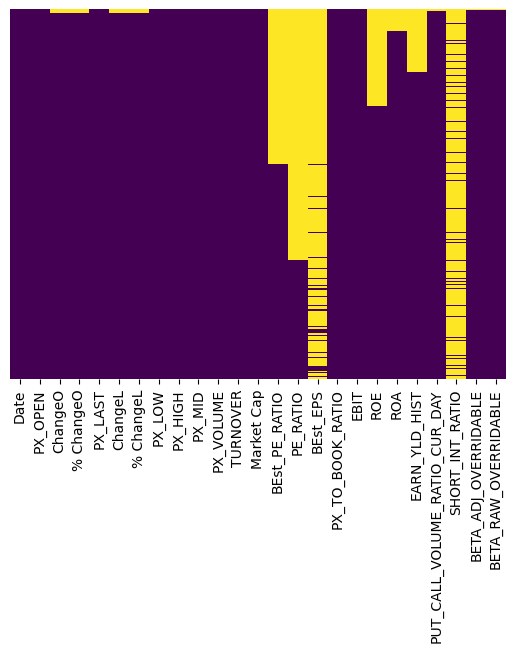

In [209]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

In [211]:
# Check the total number of missing values per column
missing_values = df .isna().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100
         
# Combine the total and percentage into a DataFrame for better presentation
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the missing data
missing_data

,Missing Values,Percentage
Date,1,0.090090
PX_OPEN,1,0.090090
ChangeO,11,0.990991
% ChangeO,11,0.990991
PX_LAST,0,0.000000
ChangeL,11,0.990991
% ChangeL,11,0.990991
PX_LOW,1,0.090090
PX_HIGH,1,0.090090
PX_MID,1,0.090090


### Removing columns with mostly missing values:

In [213]:
df = df.drop(['BEst_EPS', 'SHORT_INT_RATIO'], axis=1) 

In [215]:
df = df.dropna(how='all') #removing rows with no information

### Checking the data again

<Axes: >

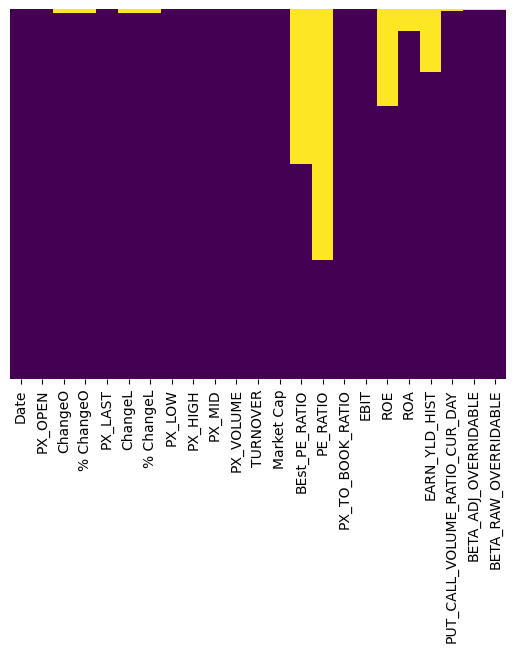

In [217]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

In [219]:
# Check the total number of missing values per column
missing_values = df .isna().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100
         
# Combine the total and percentage into a DataFrame for better presentation
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the missing data
missing_data

,Missing Values,Percentage
Date,1,0.090090
PX_OPEN,1,0.090090
ChangeO,11,0.990991
% ChangeO,11,0.990991
PX_LAST,0,0.000000
ChangeL,11,0.990991
% ChangeL,11,0.990991
PX_LOW,1,0.090090
PX_HIGH,1,0.090090
PX_MID,1,0.090090


### More data selection decisions

Currently I have to decide if I want to drop rows or columns, depending on how useful some ratios are. For now I'm removing the P/E ratios (both the Bloomberg Expected and the regular one).

In [221]:
df = df.drop(['BEst_PE_RATIO', 'PE_RATIO'], axis=1) 

I'll try to use P/B instead of P/E to understand how investors are feeling, due to the fact it has more data.

Since data regarding ROE, ROA and Earnings Yield is missing near the start of the stock, I will remove those rows, and work with the rest.

In [223]:
df = df.dropna() #removes all rows with ANY missing data

Checking again...

<Axes: >

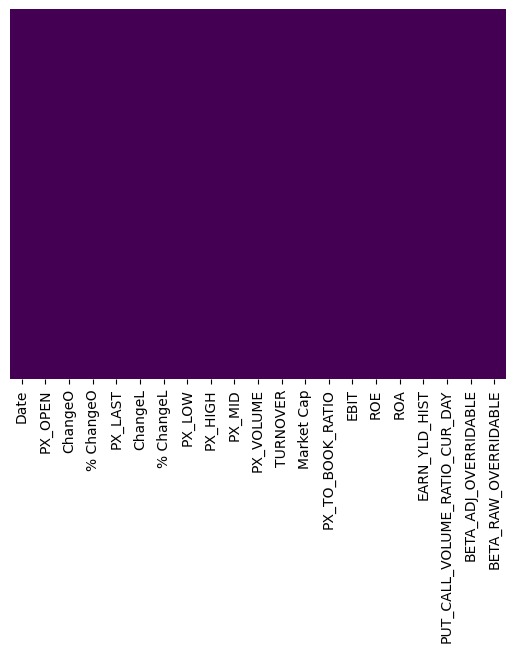

In [225]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

## Feature Engineering

### Creation of new features

In [233]:
# Creating a Daily Range column
df['Daily_Range'] = df['PX_HIGH'] - df['PX_LOW']

In [243]:
# Creating 10Day, 50Day, 200Day moving averages for the closing price, the daily range and the volume.
df['10D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=10).mean()
df['50D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=50).mean()
df['200D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=200).mean()

df['10D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=10).mean()
df['50D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=50).mean()
df['200D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=200).mean()

df['10D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=10).mean()
df['50D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=50).mean()
df['200D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=200).mean()

### Figuring out the correlation of various elements with the % change in the stock's price

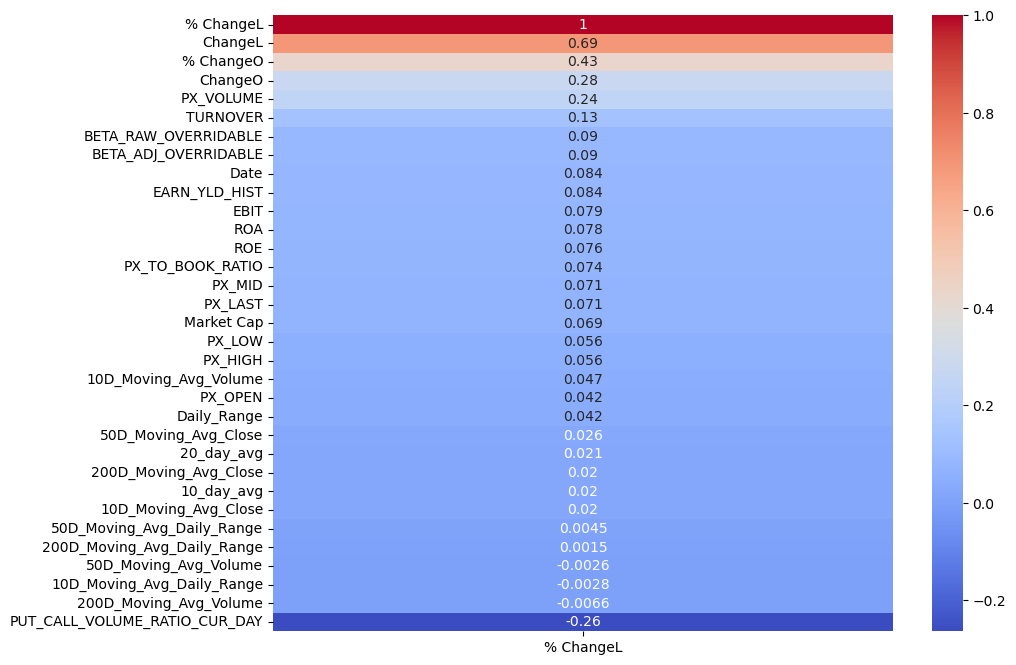

In [247]:
corr_matrix = df.corr()

# Create a heatmap of correlation with %Change
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['% ChangeL']].sort_values(by='% ChangeL', ascending=False), annot=True, cmap='coolwarm')
plt.show()